<a href="https://colab.research.google.com/github/AndresNamm/CostFunctions/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Pretty good guide by google folks](https://developers.google.com/machine-learning/crash-course/linear-regression/gradient-descent)

In [2]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, verbose=False):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.verbose = verbose
        self.weights = None
        self.bias = None
        # For scaling features (storing mean and std for each feature)
        self.mean_ = None
        self.std_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Feature scaling: Standardize features for better convergence
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        X_scaled = (X - self.mean_) / self.std_

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent loop
        for i in range(self.n_iters):
            y_predicted = np.dot(X_scaled, self.weights) + self.bias
            error = y_predicted - y
            dw = (1 / n_samples) * np.dot(X_scaled.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            if self.verbose and i % 1000 == 0:
                loss = np.mean(error ** 2)
                print(f"Iteration {i}: Loss = {loss:.4f}")

    def predict(self, X):
        # Scale features using the stored mean and std
        X_scaled = (X - self.mean_) / self.std_
        return np.dot(X_scaled, self.weights) + self.bias

    def mse(self, X, y):
        """Compute Mean Squared Error."""
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)

    def score(self, X, y):
        """Compute R² score (coefficient of determination)."""
        predictions = self.predict(X)
        ss_res = np.sum((y - predictions) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)


# --- Sample usage ---

# Expanded dataset with extra features:
# Features: [square footage, number of bedrooms, age of the house]
X = np.array([
    [1000, 2, 20],
    [1500, 3, 15],
    [2000, 4, 10],
    [2500, 4, 5],
    [3000, 5, 2]
])
y = np.array([200000, 300000, 400000, 500000, 600000])  # House prices

# Initialize and train the model
model = LinearRegression(learning_rate=0.01, n_iters=10000, verbose=True)
model.fit(X, y)

# Make predictions on new data
X_test = np.array([
    [1200, 2, 18],
    [2200, 3, 12],
    [3500, 5, 1]
])
predictions = model.predict(X_test)
print("Predictions:", predictions)

# Evaluate the model on training data
print("MSE on training data:", model.mse(X, y))
print("R² score on training data:", model.score(X, y))


Iteration 0: Loss = 180000000000.0000
Iteration 1000: Loss = 83677847.3696
Iteration 2000: Loss = 54749487.7112
Iteration 3000: Loss = 40607322.3874
Iteration 4000: Loss = 33156427.1003
Iteration 5000: Loss = 28774411.0548
Iteration 6000: Loss = 25837342.8641
Iteration 7000: Loss = 23614524.1500
Iteration 8000: Loss = 21774685.4588
Iteration 9000: Loss = 20165346.2951
Predictions: [236487.69107399 410786.17600561 664012.29163628]
MSE on training data: 18714217.158764087
R² score on training data: 0.9990642891420618


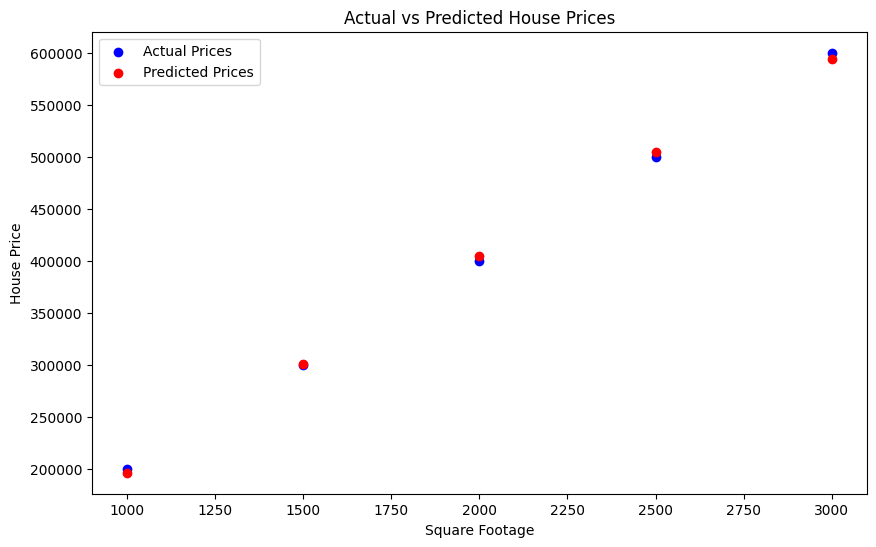

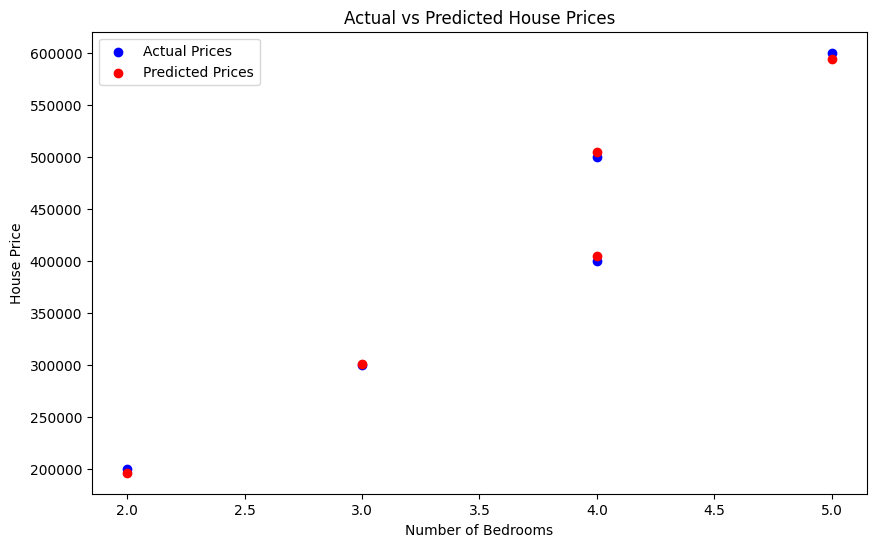

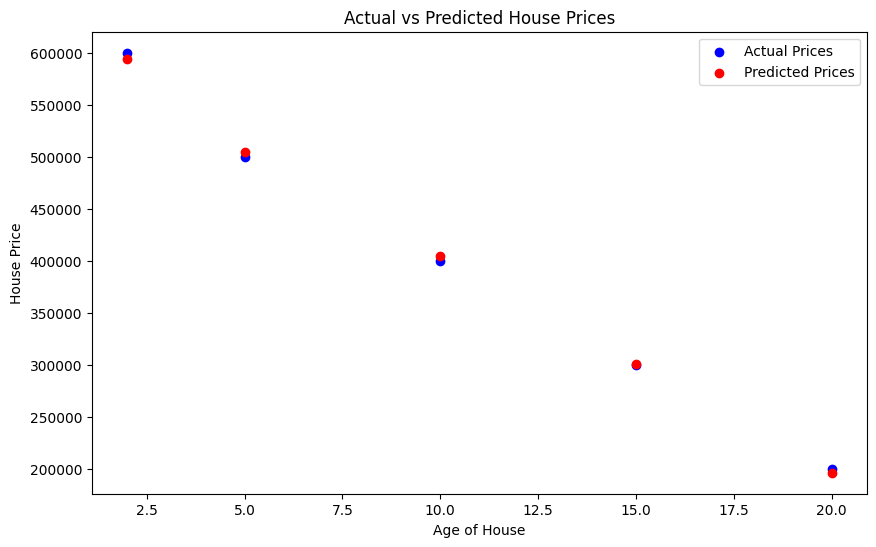

In [3]:
# prompt: visualize prediction results

import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Make predictions on the training data for visualization
y_pred = model.predict(X)

# Visualize predictions vs actual values for each feature
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], y, color='blue', label='Actual Prices')
plt.scatter(X[:,0], y_pred, color='red', label='Predicted Prices')
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, color='blue', label='Actual Prices')
plt.scatter(X[:,1], y_pred, color='red', label='Predicted Prices')
plt.xlabel("Number of Bedrooms")
plt.ylabel("House Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 2], y, color='blue', label='Actual Prices')
plt.scatter(X[:, 2], y_pred, color='red', label='Predicted Prices')
plt.xlabel("Age of House")
plt.ylabel("House Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()
